# Assignment: Week 04

This week, we will be putting to use some of the skills we have developed over the last couple weeks.

You will be tasked with examining a new dataset, constructing a class that operates on it, and plotting a few different aspects of that dataset.

Our dataset will be the trees owned by the City of Champaign.

You will have to load in the data, filter and split based on a few criteria, and then make visualizations.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In the next cell, read in the data using CSV.  You do not (yet) need to apply any data-type conversions; what needs to come out of this is a `dict` object (call this object "`data`") which is composed of lists, one for every header.

In [3]:
fn = "/home/huilyu2/work/Trees_Owned_by_the_City_of_Champaign.csv"
# /home/huilyu2/work/Trees_Owned_by_the_City_of_Champaign.csv
# YOUR CODE HERE
data = {}
with open(fn, "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    for column in header:
        data[column] = []
    for row in reader:
        for column, value in zip(header,row):
            data[column].append(value)


In [4]:
np.testing.assert_equal(len(data), 6)
for col in data:
    np.testing.assert_equal(len(data[col]), 26940)

The column `Location` is not in a useful form.  You may use the code below to convert it to Latitude and Longitude.

The original form is in a string such as:

`'(40.15271592360, -88.25708727630)'`

We will use "split" on these and strip off the leading and trailing parenthesis.  Because this is material that we have not covered in class before, you may use this code directly.

In [5]:
data["Latitude"] = []
data["Longitude"] = []
for loc in data["Location"]:
    lat, lon = loc.split(",")
    data["Latitude"].append(float(lat[1:]))
    data["Longitude"].append(float(lon[:-1]))

Below, construct a dataset class.  You will see stub functions.  You may reuse what we have worked on in class, or you may develop something new.

You must implement the routines `convert`, `columns`, `filter_eq`, `filter_lt`, `filter_gt`, `filter_ne`, `size` and `split`.

In [6]:
class Dataset:
    def __init__(self, data):
        self.data = data.copy()
        
    def convert(self, column, dtype):
        # YOUR CODE HERE
        self.data[column] = np.array(self.data[column], dtype=dtype)
        #raise NotImplementedError()
        
    def columns(self):
        # YOUR CODE HERE
        return self.data.keys()
        #raise NotImplementedError()
    
    def filter_eq(self, column, value):
        # YOUR CODE HERE
        good = (self.data[column] == value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
        #raise NotImplementedError()
    
    def filter_lt(self, column, value):
        # YOUR CODE HERE
        good = (self.data[column] < value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
        #raise NotImplementedError()
    
    def filter_gt(self, column, value):
        # YOUR CODE HERE
        good = (self.data[column] > value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
        #raise NotImplementedError()
    
    def filter_ne(self, column, value):
        # YOUR CODE HERE
        good = (self.data[column] != value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
        #raise NotImplementedError()
    
    def size(self):
        # YOUR CODE HERE
        for key in self.data:
            return self.data[key].size
        #raise NotImplementedError()

    def split(self, column):
        # YOUR CODE HERE
        new_datasets = {}
        for split_value in np.unique(self.data[column]):
            new_datasets[split_value] = self.filter_eq(column, split_value)
        return new_datasets
        #raise NotImplementedError()

    def stats(self):
        statistics = {}
        for key in self.data:
            if self.data[key].dtype not in ("float", "int"):
                continue
            values = self.data[key]
            statistics[key] = (values.min(), values.max(), values.std(), values.mean())
        return statistics
    
    def compare(self, other):
        stats1 = self.stats()
        stats2 = other.stats()
        for column in self.columns():
            if column not in stats1: continue
            print("Column '{0:25s}'".format(column))
            for s1, s2 in zip(stats1[column], stats2[column]):
                print("    {0} vs {1}".format(s1, s2))
    
    def plot(self, x_column, y_column):
        plt.plot(self.data[x_column], self.data[y_column], '.')

In [7]:
trees = Dataset(data)
value_types = {'Number of Trunks': 'int',
               'Diameter at Breast Height (in Feet)': 'float',
               'Latitude': 'float',
               'Longitude': 'float'}
for v in trees.columns():
    trees.convert(v, value_types.get(v, "str"))

In [8]:
trees.columns()

dict_keys(['Location', 'Location Type', 'Number of Trunks', 'Tree Species', 'Common Name', 'Latitude', 'Diameter at Breast Height (in Feet)', 'Longitude'])

In [9]:
trees.stats()

{'Diameter at Breast Height (in Feet)': (0.0,
  66.0,
  10.861653033471049,
  11.786859688195991),
 'Latitude': (40.062448026799999,
  40.157864508700001,
  0.018631504154802202,
  40.109769693773714),
 'Longitude': (-88.332789230800003,
  -88.226835618999999,
  0.024903362050755964,
  -88.271520700506983),
 'Number of Trunks': (0, 20, 0.61681964144612522, 0.86915367483296213)}

We will now test that this works by filtering out a given tree species.

In [10]:
quercus_bicolor = trees.filter_eq("Tree Species", "Quercus bicolor")
np.testing.assert_equal(quercus_bicolor.size(), 1239)
stats = quercus_bicolor.stats()
np.testing.assert_equal(stats['Diameter at Breast Height (in Feet)'],
                (1.0,
                 44.0,
                 4.8951987699249253,
                 8.3123486682808725))
np.testing.assert_equal(stats['Latitude'],
                (40.070883672699999,
                 40.156343598100001,
                 0.020057649584011371,
                 40.106116841942452))
np.testing.assert_equal(stats['Longitude'],
                (-88.332447309000003,
                 -88.229326890500005,
                 0.023900192692977454,
                 -88.2782118899284))
np.testing.assert_equal(stats['Number of Trunks'],
                (0,
                 2,
                 0.063479522525377516,
                 0.99757869249394671))

## Visualization Assignment


For the next phase, there will be a manually-graded section of the homework.  This will be worth 50% of the point total.

You should implement the function `make_plots`.  It should accept a `Dataset` object, a name, and should generate four plots:

 * Locations of trees (this can utilize *just* the lat/lon, and does not need to be overlaid on a map)
 * Distribution of tree trunk count for five most common tree species
 * Most common tree species across spatial ranges (binning)
 * Distribution of tree trunk breadth

Your plots (worth 9 points out of a total of 30 for the assignment) will be graded on:

 * Clarity of the visual presentation
 * All components of the plot are present to allow for interpretation of the plot (labels, etc)
 * Reusability of the plots; could the function be used across different datasets drawn from this single dataset?
 * Aesthetics will be discussed in feedback

In [11]:
from collections import Counter

In [12]:
def first_graph(dataset,name):
    if name == "All Trees":
        vacant_trees = dataset.filter_eq("Tree Species", "vacant site large")
        non_vacant_trees = dataset.filter_ne("Tree Species", "vacant site large")
        plt.plot(non_vacant_trees.data['Longitude'], non_vacant_trees.data['Latitude'],".",label= "non-vacant site",alpha = 0.5)
        plt.plot(vacant_trees.data['Longitude'], vacant_trees.data['Latitude'],".",label= "vacant site large",alpha = 0.5)
        plt.xlabel("Longitude",fontsize=20)
        plt.ylabel("Latitude",fontsize=20)
        plt.title("Location of {}".format(name),fontsize=22)
        plt.grid(True)
        plt.legend()
    else:
        plt.plot(dataset.data['Longitude'], dataset.data['Latitude'],".",alpha = 0.5)
        plt.xlabel("Longitude",fontsize=20)
        plt.ylabel("Latitude",fontsize=20)
        plt.title("Location of {}".format(name),fontsize=22)
        plt.grid(True)

In [13]:
count = Counter(trees.filter_ne("Tree Species", "vacant site large").data["Tree Species"])
count.most_common(5)

[('Acer rubrum', 2562),
 ('Acer saccharum', 1663),
 ('Acer saccharinum', 1555),
 ('Quercus rubra', 1442),
 ('Quercus bicolor', 1239)]

In [14]:
def second_graph(dataset,name):
    count = Counter(dataset.data["Tree Species"])
    most_common = count.most_common(5)
    most_common_dict = dict((str(k), v) for k, v in most_common)
    number_of_trunk = {}
    for key in most_common_dict.keys():
        number_of_trunk[key] = dataset.filter_eq("Tree Species",key).data["Number of Trunks"]
    
    n, bins, patches = plt.hist(number_of_trunk.values(), stacked = True, log = True, edgecolor = 'gray',bins = np.arange(10),align='left', label = number_of_trunk.keys(),alpha=0.75)
    # refer to Stack Overflow 
    # http://stackoverflow.com/questions/18449602/matplotlib-creating-stacked-histogram-from-three-unequal-length-arrays
    plt.legend()
    plt.xticks(np.arange(10))
    plt.xlabel("Number of Trunks of Each Tree",fontsize=20)
    plt.ylabel("Number of Trees",fontsize=20)
    plt.ylim(10**(-1),10**4)
    plt.title("Distribution of tree trunk count for\nfive most common species in {}".format(name),fontsize=22)

In [15]:
def third_graph(dataset,name):

    most_common = Counter(dataset.data["Tree Species"]).most_common(1)
    most_common_dict = dict((str(k), v) for k, v in most_common)
    dataset = dataset.filter_eq("Tree Species", list(most_common_dict)[0])

    # The following code is referred to the in-class notes.
    stats = dataset.stats()
    lon_min = stats["Longitude"][0]
    lon_max = stats["Longitude"][1]
    lat_min = stats["Latitude"][0]
    lat_max = stats["Latitude"][1]
    def bin_trees(num_bins = 16):
        lon = np.mgrid[lon_min:lon_max:(num_bins+1)*1j]
        lat = np.mgrid[lat_min:lat_max:(num_bins+1)*1j]

        tree_count = np.zeros((num_bins, num_bins))
        for i in range(num_bins):
            left_lat = lat[i]
            right_lat = lat[i+1]
            filter_lat_left = dataset.filter_gt("Latitude", left_lat)
            filter_lat_right = filter_lat_left.filter_lt("Latitude", right_lat)
            for j in range(num_bins):
                left_lon = lon[j]
                right_lon = lon[j+1]
                filter_lon_left = filter_lat_right.filter_gt("Longitude", left_lon)
                filter_lon_right = filter_lon_left.filter_lt("Longitude", right_lon)
                tree_count[i,j] += filter_lon_right.size()

        plt.imshow(tree_count, extent=(lon_min,lon_max,lat_min,lat_max), origin="lower")
        plt.xlabel("Longitude",fontsize=20)
        plt.ylabel("Latitude",fontsize=20)
        plt.title("Most common species '{}'\nacross spatial ranges in {}".format(list(most_common_dict)[0],name), fontsize=22)
        color_bar = plt.colorbar()
        color_bar.set_label("Count")
        
    bin_trees()
    #import ipywidgets
    #ipywidgets.interact(bin_trees, num_bins = (4,128))

In [16]:
def fourth_graph(dataset,name):
    min_number = dataset.data["Diameter at Breast Height (in Feet)"].min()
    max_number = dataset.data["Diameter at Breast Height (in Feet)"].max()
    bins = np.mgrid[min_number:max_number+10:5]
    plt.hist(dataset.data["Diameter at Breast Height (in Feet)"], alpha = 0.75,bins=bins,edgecolor = 'k')
    plt.xlabel("Diameter at Breast Height (in Feet) of Each Tree",fontsize=20)
    plt.ylabel("Number of Trees",fontsize=20)
    plt.title("Distribution of tree trunk breadth in {}".format(name),fontsize=22)
    plt.xticks(bins)

In [17]:
plt.rcParams["figure.figsize"] = (20, 20)
def make_plots(dataset, name = ""):
    # YOUR CODE HERE
    if (name == "All Trees") | (name == "Non-Vacant Site"):
        plt.subplot(2,2,1)       
        first_graph(dataset,name)
        
        plt.subplot(2,2,2)
        second_graph(dataset,name)
       
        plt.subplot(2,2,3)
        third_graph(dataset,name)
        
        plt.subplot(2,2,4)
        fourth_graph(dataset,name)
        
    else:
        plt.subplot(2,2,1)       
        first_graph(dataset,name)
        
        plt.subplot(2,2,2)
        max_number = dataset.data["Number of Trunks"].max()
        plt.hist(dataset.data["Number of Trunks"],log=True,edgecolor='k', bins = np.arange(max_number+3),align='left',alpha=0.75)
        plt.title("Distribution of tree trunk count\nfor the species {}".format(name),fontsize=22)
        plt.xlabel("Number of Trunks of Each Tree",fontsize=20)
        plt.ylabel("Number of Trees",fontsize=20)
        plt.xticks(np.arange(max_number+3))
                  
        plt.subplot(2,2,3)
        # The following code is referred to the in-class notes.
        stats = dataset.stats()
        lon_min = stats["Longitude"][0]
        lon_max = stats["Longitude"][1]
        lat_min = stats["Latitude"][0]
        lat_max = stats["Latitude"][1]
        def bin_trees(num_bins = 16):
            lon = np.mgrid[lon_min:lon_max:(num_bins+1)*1j]
            lat = np.mgrid[lat_min:lat_max:(num_bins+1)*1j]

            tree_count = np.zeros((num_bins, num_bins))
            for i in range(num_bins):
                left_lat = lat[i]
                right_lat = lat[i+1]
                filter_lat_left = dataset.filter_gt("Latitude", left_lat)
                filter_lat_right = filter_lat_left.filter_lt("Latitude", right_lat)
                for j in range(num_bins):
                    left_lon = lon[j]
                    right_lon = lon[j+1]
                    filter_lon_left = filter_lat_right.filter_gt("Longitude", left_lon)
                    filter_lon_right = filter_lon_left.filter_lt("Longitude", right_lon)
                    tree_count[i,j] += filter_lon_right.size()

            plt.imshow(tree_count, extent=(lon_min,lon_max,lat_min,lat_max), origin="lower")
            plt.xlabel("Longitude",fontsize=20)
            plt.ylabel("Latitude",fontsize=20)
            plt.title("Tree species '{}'\nacross spatial ranges".format(name), fontsize=22)
            color_bar = plt.colorbar()
            color_bar.set_label("Count")
            
        bin_trees()
        
        plt.subplot(2,2,4)
        fourth_graph(dataset,name)

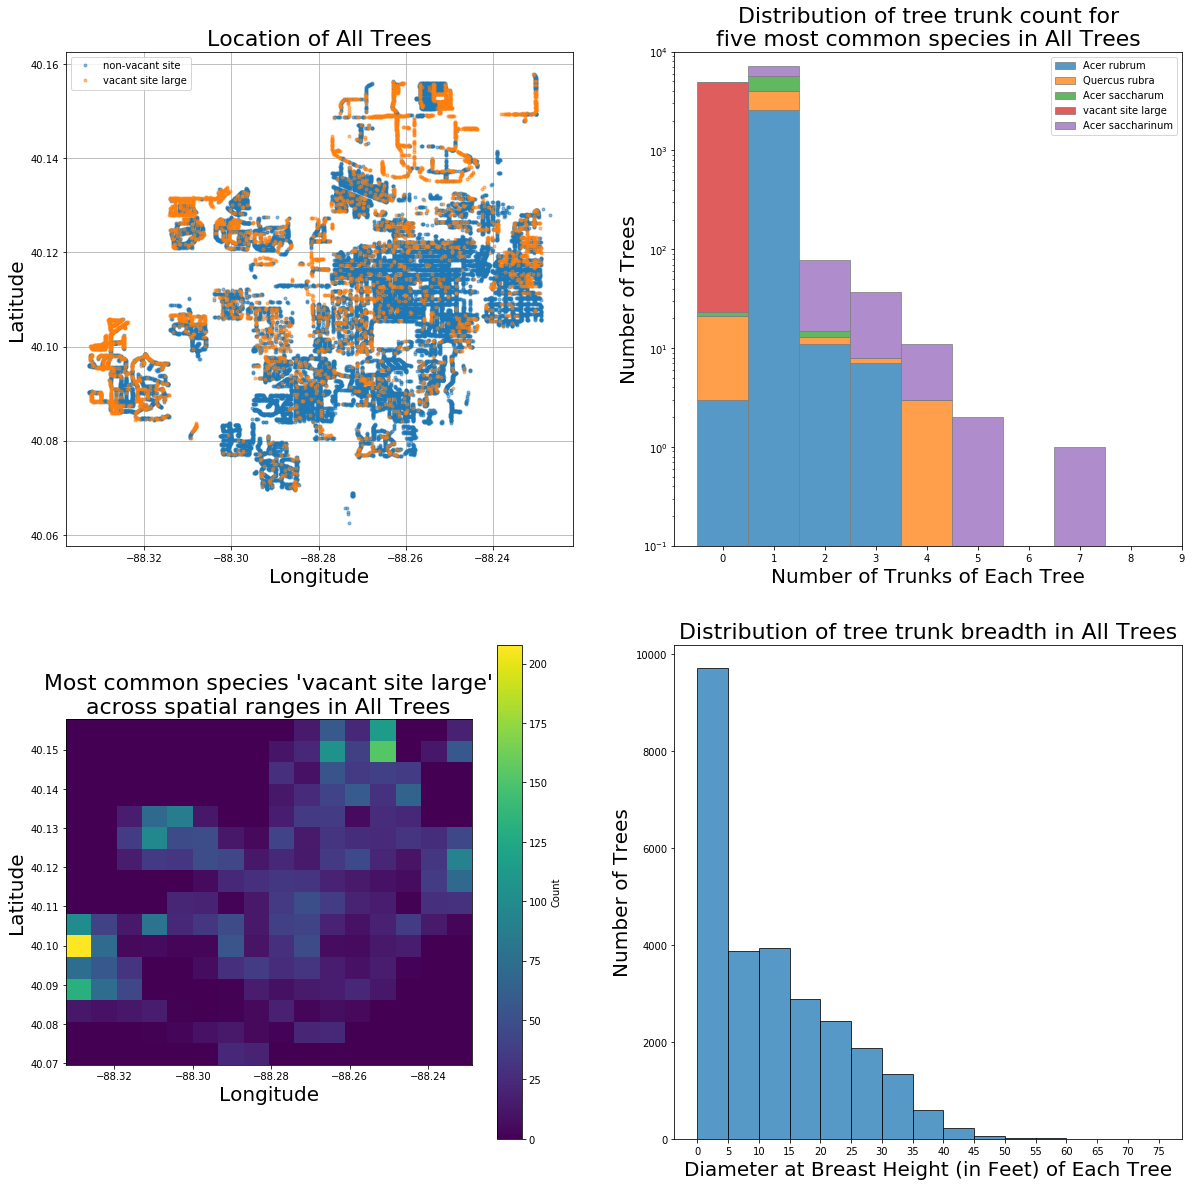

In [18]:
make_plots(trees, "All Trees")

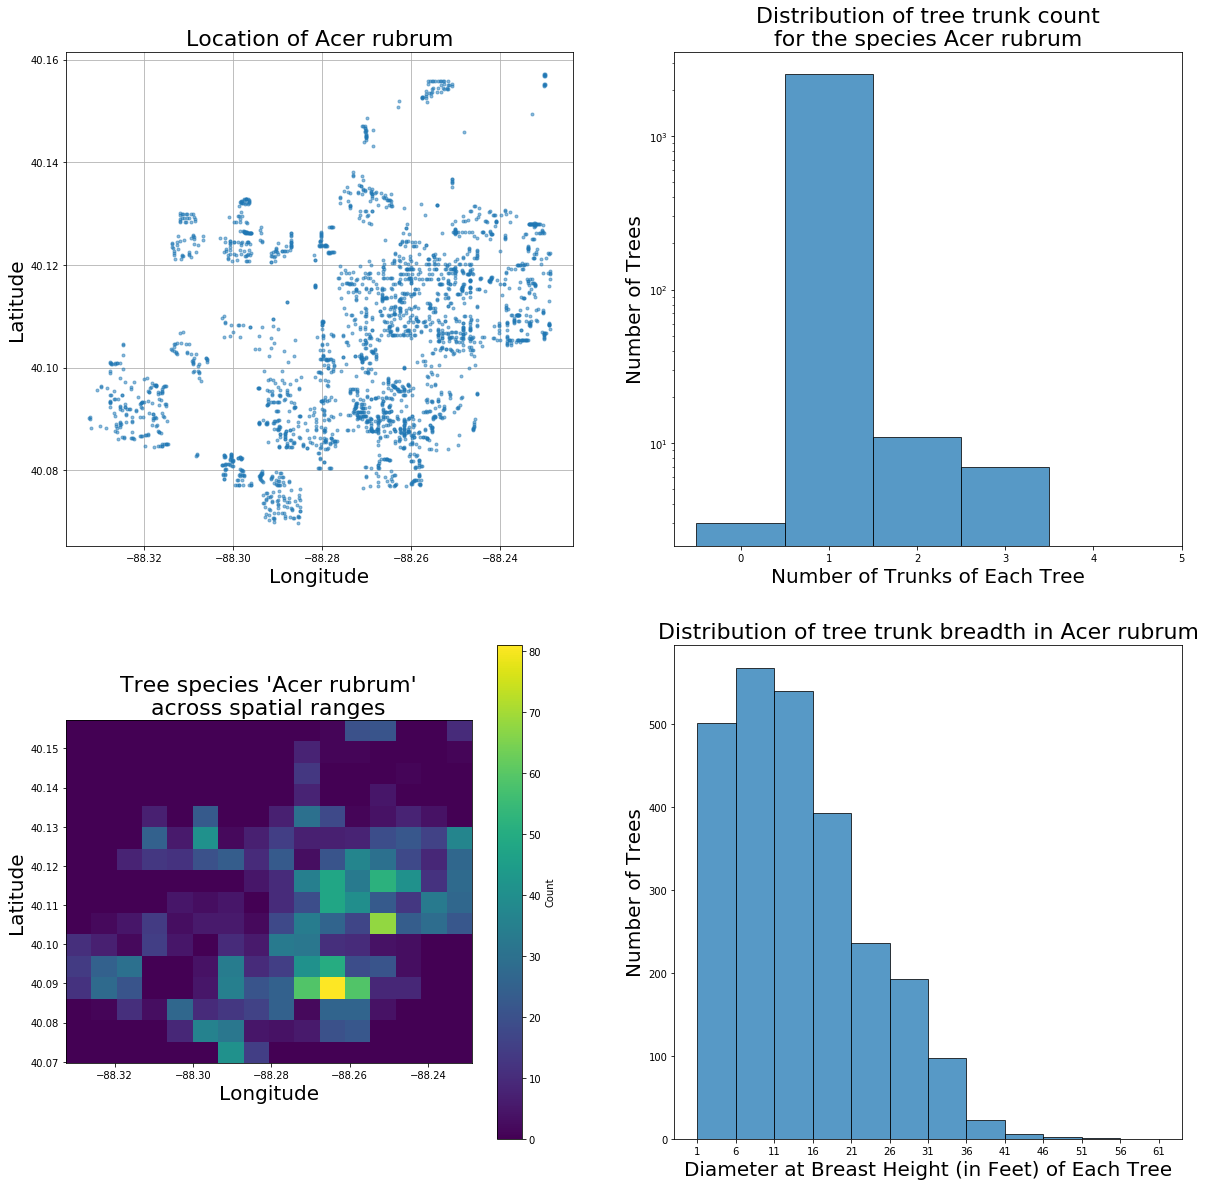

In [19]:
make_plots(trees.filter_eq("Tree Species", "Acer rubrum"), "Acer rubrum")

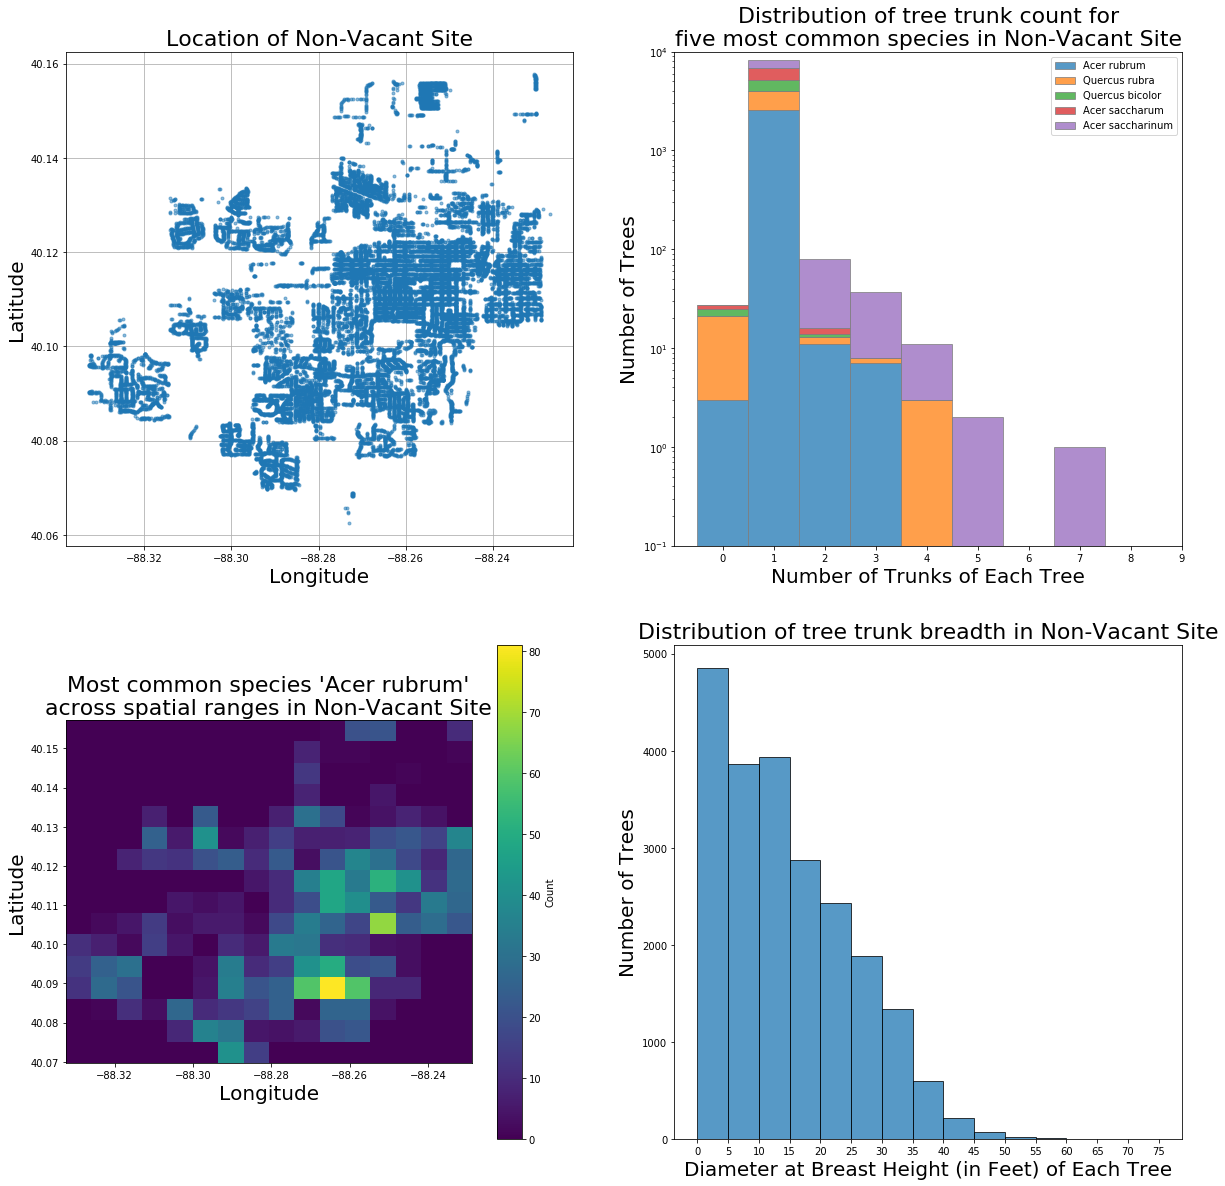

In [20]:
make_plots(trees.filter_ne("Tree Species", "vacant site large"), "Non-Vacant Site")

In the next cell, describe why you made the specific choices you did in visualizing the data.  Address your choice of words, colors, plotting mechanisms, binning or smoothing mechanisms, and any other choices that you made.  This will be worth 6 points out of a total of 30 for the assignment.

# Documentation
Generally, I split the make_plots function into two scenarios. 
1. The first scenario is for dataset with multiple tree species. In this case, "All Trees" and "Non-Vacant Site" belong to the first scenario. I will pick the (five) most common species in this type of dataset to make relevant plots. 
2. The second scenario is for dataset with single tree species. In this case, a specific species name is passed as name varible in the make_plots function. The following figures are generated through this specific species dataset.

## First graph: Location of Trees
I choose the type of scatter plot, using Longitude and Latitude as x and y axes. The dot plot is good to visualizae the data because the exact location matters visually. Lines, bars, circles or pies are too large to exactly show the location. Besides, the location of each tree is independent to each other. A single dot represents a location of one specific tree.

When some dots are clustered together in the figure, we can easily find deep and dense regions, which could help to identify the distribution of locations of trees.

In addition, I set alpha to 0.5 since many dots are overlapping. I also turn the grid on to better locate the positions.

For "All Trees", I firstly divide the whole dataset into two sub datasets: vacant site large and non-vacant site. (In addition to 'vacant site large' species, there is another species called 'vacant site medium'. While I just ignore this issue and regard all trees that are not vacant site large species as non-vacant site trees.) Then, I plot the two sub datasets respectively and add labels to generate legend for the final figure. From this graph, dots of two colors represent vacant and non-vacant trees. The distribution of locations of trees can be shown clearly.

## Second graph: Distribution of Tree Trunk Count
* For the first scenario (multiple species):

After counting the most common five species in the given dataset, I create a dictionary including the species names and their numbers of trunks in order to plot a stacked histogram to show the distribution of tree trunk count for five most common tree species.

Since the tree trunk are all integers, I decide to plot a histogram to show its distribution. There are five species for plotting, so I decide to stack them together. Most trees have only one trunk.

If I did not use log y scale for the histogram, the height of one of the bars would be far more than the others, and the details for lower bars could not be seen either. So I set the log=True to see the details in each bar. **In this way, we need to pay special attention to both the height and position of each bar since the y scale is not linear, which means longer bins may not represent more amounts. The height position of the bar matters. It's in log scale but not proportional scale.**

Besides, I set plt.ylim(10^(-1),10^4) since there exists bar that is lower than 10^0. To show them all, I make the y-axis range larger. 

**If we want to see the true proportional distribution, the y-scale should remain linear.**

I set edgecolor to gray to distinguish the bars, and alpha=0.75 to beautify it.

I set bins=np.arange(10) since tree count can only be integers, and the five most common species (whether vacant or not) all have less than 8 trunks. Besides, I set xticks equal to bins to make it align, and set align='left' to make xtick labels in the middle of each bar. In this way, we can definitely find one bar corresponds to one integer without ambiguity.

In addition, I add labels to the five species and plot the legend for the figure.

* For the second scenario(single species):

I still use the histogram with log y scale to plot a distribution of tree trunks for a single species. I set bins and xticks to np.arange(max_number+3) to be applicable to any species distribution.

## Third graph: Trees Across Spatial Ranges (binning)
* For the first scenario (multiple species):

I firstly use Counter to select the most common tree in the given dataset. Then as Professor Turk showed in class, I use stast function to find the minimum and maximum of longitude and latitude values as the boundary of the binning. The np.mgrid function can generate boundary lines for each bin. Then I use the code in class to establish a 2-dimension binning. It is a nested loop to count trees located in each square of the binning. For plt.imshow function, setting the extent to be boundary and location to be "lower" can clarify the x and y limits and show the meaningful longitude and latitude as it supposed to be. 

In addition, I set the label of colorbar to be "Count" to help better calrify the meaning of the colors in the figure. 

I do not maintain the interact function for controlling the number of bins since I hope all statments can create a unified binning graph to compare with each other.

* For the second scenario(single species):

In this scenario, I use the same method to generate the spatial ranges graph for a single species.

## Fourth graph: Distribution of Tree Trunk Breadth

For both scenarios, I plot a histogram for data of Diameter at Breast Height (in Feet) to show its distribution. Especially, I set bins to be from the minimum of diameters to the maximum of diameters and the step is equal to five. I suppose it is a good interval for visualization.

Also, I set the xticks to be the same as bins to align them together. In this way, the boundary of each bin corresponds to a single number in the x axis to avoid ambiguity.

I set edgecolor to black and alpha=0.75 to beautify the plot.

## Additional remarks for the third test statement:
In addition to 'vacant site large' species, there is another species called 'vacant site medium'. I suppose the name that is passed to the make_plots function should not be "Non-Vacant Site" ideally. While I just ignore this issue and regard all trees that are not 'vacant site large' species as non-vacant site trees.